In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [2]:
movies = pd.read_csv("C://Users/artor/Desktop/EPFL/Fall22/ADA/Project/DATA/movie.metadata.csv")
characters = pd.read_csv("C://Users/artor/Desktop/EPFL/Fall22/ADA/Project/DATA/character.metadata.csv")

_________________________________________________________________________________________________________________

# Movies preliminary

In [3]:
movies.sample(3)

,W_ID,F_ID,MOVIE NAME,RELEASE,REVENUE,RUNTIME,F_ID: LANGUAGE,F_ID: Country,F_ID: Genres
2727,23541198,/m/0b6q30b,Killer Hair,6/21/2009,NaN,90.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0d060g"": ""Canada""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/015w9s"": ""Te..."
3513,20555320,/m/051z0qp,Nakhashathangal,NaN,NaN,NaN,"{""/m/0999q"": ""Malayalam Language""}","{""/m/03rk0"": ""India""}","{""/m/068d7h"": ""Romantic drama""}"
10591,14689013,/m/03gt545,Parnell,6/4/1937,NaN,118.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."


In [4]:
display(movies.dtypes)

W_ID                int64
F_ID               object
MOVIE NAME         object
RELEASE            object
REVENUE           float64
RUNTIME           float64
F_ID: LANGUAGE     object
F_ID: Country      object
F_ID: Genres       object
dtype: object

In [5]:
print('There are {} entries in the movies dataset'.format(len(movies)))

There are 81741 entries in the movies dataset


In [6]:
print('{:.4} % of movies have an associated Wikipedia Movie ID'.format(100 * len(movies[movies['W_ID'].notnull()])/len(movies['W_ID'])))
print('{:.4} % of movies have an associated Freebase movie ID'.format(100 * len(movies[movies['F_ID'].notnull()])/len(movies['F_ID'])))
print('{:.4} % of movies have an associated Movie Name'.format(100 * len(movies[movies['MOVIE NAME'].notnull()])/len(movies['MOVIE NAME'])))
print('{:.4} % of movies have an associated language(s)'.format(100 * len(movies[movies['F_ID: LANGUAGE'].notnull()])/len(movies['F_ID: LANGUAGE'])))
print('{:.4} % of movies have an associated country'.format(100 * len(movies[movies['F_ID: Country'].notnull()])/len(movies['F_ID: Country'])))
print('{:.4} % of movies have an associated genre(s)'.format(100 * len(movies[movies['F_ID: Genres'].notnull()])/len(movies['F_ID: Genres'])))
print('{:.4} % of movies have an associated release date'.format(100 * len(movies[movies['RELEASE'].notnull()])/len(movies['RELEASE'])))
print('{:.4} % of movies have an associated runtime'.format(100 * len(movies[movies['RUNTIME'].notnull()])/len(movies['RUNTIME'])))
print('{:.4} % of movies have an associated revenue'.format(100 * len(movies[movies['REVENUE'].notnull()])/len(movies['REVENUE'])))


100.0 % of movies have an associated Wikipedia Movie ID
100.0 % of movies have an associated Freebase movie ID
100.0 % of movies have an associated Movie Name
100.0 % of movies have an associated language(s)
100.0 % of movies have an associated country
100.0 % of movies have an associated genre(s)
91.56 % of movies have an associated release date
74.98 % of movies have an associated runtime
10.28 % of movies have an associated revenue


In [7]:
# done more cleanly, but the 'name' are not as readable...

for name, values in movies.items():
    print ('{:.4} % of movies have an associated {}'.format(100 * len(values.loc[values.notnull()])/len(values), name))

100.0 % of movies have an associated W_ID
100.0 % of movies have an associated F_ID
100.0 % of movies have an associated MOVIE NAME
91.56 % of movies have an associated RELEASE
10.28 % of movies have an associated REVENUE
74.98 % of movies have an associated RUNTIME
100.0 % of movies have an associated F_ID: LANGUAGE
100.0 % of movies have an associated F_ID: Country
100.0 % of movies have an associated F_ID: Genres


many of the date formats are inconsistent. Here we convert it all to just year as this is the temporal resolution in which we are interested

In [8]:
movies['RELEASE'] = pd.to_datetime(movies['RELEASE'], errors = 'coerce')  # change all formats to datetime
movies['RELEASE']= movies['RELEASE'].dt.year                              # keep just the year of the datetime 

### Release Dates

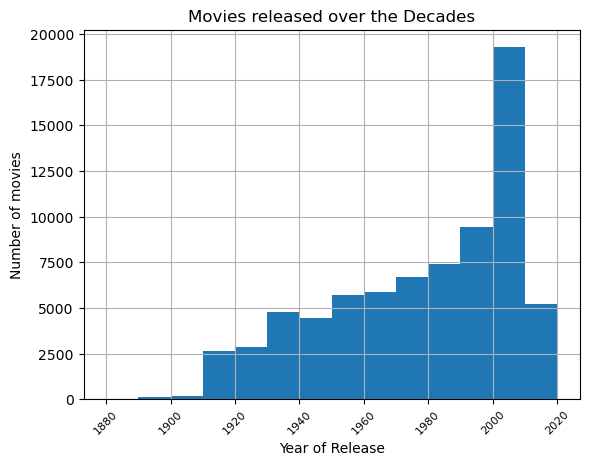

In [9]:
movies['RELEASE'].hist(bins = range(1880,2030,10), grid = True, xlabelsize = 8 ,xrot = 45)
plt.xlabel('Year of Release')
plt.ylabel('Number of movies')
plt.title('Movies released over the Decades');

On 16 December 2014, Google announced that it would shut down Freebase over the succeeding six months and help with the move of the data from Freebase to Wikidata. data collection does not go through the entire 2010's decade

In [10]:
print('The dataset is comprised of movies with known releases between {0:n} and {1:n} '.format(movies['RELEASE'].min(), movies['RELEASE'].max()))

The dataset is comprised of movies with known releases between 1888 and 2016 


### Revenues

In [11]:
rmovies = movies[movies['REVENUE'].notnull()]

In [12]:
print('Only {:.4} % of movies have an associated revenue'.format(100 * len(rmovies)/len(movies)))

Only 10.28 % of movies have an associated revenue


In [13]:
r_by_year = rmovies.groupby("RELEASE")['REVENUE'].agg(['mean','size']).reset_index()

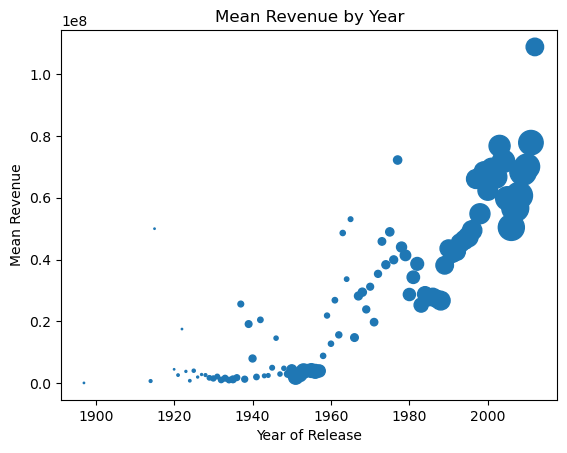

In [14]:
r_by_year.plot(kind = 'scatter', x = 'RELEASE', y = 'mean',s = 'size')
plt.title('Mean Revenue by Year')
plt.ylabel('Mean Revenue')
plt.xlabel('Year of Release');

we see that the mean revenues increase over time.. It would be interesting to normalize this by inflation or perhaps some share of GDP. We also see that there is much more data present in the later years (dot size scaled by amount of revenues averaged to form datapoint. 1897 - 1 movie revenue, 2008 - 367 movie revenues)

### Country

In [15]:
c_movies_filt = pd.DataFrame(movies.groupby(["RELEASE","F_ID: Country"]).size()).reset_index()

In [16]:
movies["F_ID: Country"].nunique()

2124

In [17]:
c_movies_filt.set_axis(['Release Date', 'Country', 'Count'], axis='columns', inplace=True)
c_movies_filt

,Release Date,Country,Count
0,1888.0,"{""/m/07ssc"": ""United Kingdom""}",1
1,1889.0,"{""/m/07ssc"": ""United Kingdom""}",1
2,1890.0,"{""/m/07ssc"": ""United Kingdom""}",1
3,1890.0,"{""/m/09c7w0"": ""United States of America""}",1
4,1891.0,"{""/m/09c7w0"": ""United States of America""}",1
...,...,...,...
8939,2014.0,{},8
8940,2015.0,"{""/m/09c7w0"": ""United States of America""}",2
8941,2015.0,{},2
8942,2016.0,"{""/m/09c7w0"": ""United States of America""}",2


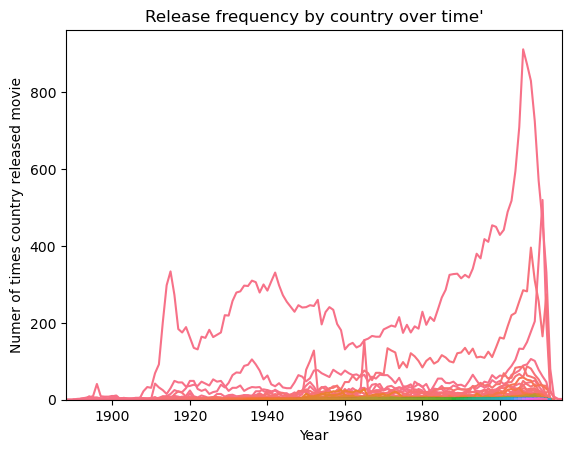

In [18]:
sns.lineplot(x='Release Date', y='Count',data = c_movies_filt, hue = 'Country', legend=False)
plt.xlabel("Year")
plt.ylabel("Numer of times country released movie")
plt.title("Release frequency by country over time'")
plt.ylim([0,c_movies_filt['Count'].max()+50])
plt.xlim([c_movies_filt['Release Date'].min(), c_movies_filt['Release Date'].max()]);
#plt.yscale('log')

group countries by continent? currently there are 2124 unique country ID's... 

First step is split them from their freebase ID..? then pass in dictionary of continent: list of countries 

would make graph much more interpretable/ see pycountry-convert on github...

--------------------------------------------------------------------------------

# Characters Preliminary

In [19]:
characters.sample(3)

,W_ID,F_ID,Release Date,Char_Name,Actor DOB,Gender,Height (m),Ethnicity,Actor,Actor age at Release,FB_Charactor/actor map id,FB_char_ID,FB_Actor_ID
339150,17435717,/m/04g294c,2/26/1928,NaN,NaN,F,NaN,NaN,Dorothy Mathews,NaN,/m/05bh24r,NaN,/m/05bh24v
223904,17288740,/m/043mmgb,3/28/2001,Ramzy,3/10/1972,M,NaN,NaN,Ramzy Bedia,29.0,/m/0n7w66x,/m/0n670jv,/m/0b_hqh4
350843,35574434,/m/0crww_5,3/14/1999,NaN,12/29/1950,M,1.715,NaN,Jon Polito,48.0,/m/0cs722z,NaN,/m/046chh


In [20]:
display(characters.dtypes)

W_ID                           int64
F_ID                          object
Release Date                  object
Char_Name                     object
Actor DOB                     object
Gender                        object
Height (m)                   float64
Ethnicity                     object
Actor                         object
Actor age at Release         float64
FB_Charactor/actor map id     object
FB_char_ID                    object
FB_Actor_ID                   object
dtype: object

In [21]:
print('There are {} entries in the characters dataset'.format(len(characters)))

There are 450669 entries in the characters dataset


In [22]:
for name, values in characters.items():
    print ('{:.4} % of characters have an associated {}'.format(100 * len(values.loc[values.notnull()])/len(values), name))

100.0 % of characters have an associated W_ID
100.0 % of characters have an associated F_ID
97.78 % of characters have an associated Release Date
42.78 % of characters have an associated Char_Name
76.45 % of characters have an associated Actor DOB
89.88 % of characters have an associated Gender
34.35 % of characters have an associated Height (m)
23.53 % of characters have an associated Ethnicity
99.73 % of characters have an associated Actor
64.92 % of characters have an associated Actor age at Release
100.0 % of characters have an associated FB_Charactor/actor map id
42.78 % of characters have an associated FB_char_ID
99.82 % of characters have an associated FB_Actor_ID


In [23]:
characters['Release Date'] = pd.to_datetime(characters['Release Date'], errors = 'coerce') #change all formats to datetime
characters['Release Date']=characters['Release Date'].dt.year                              #keep just the year of the datetime

### Age analysis

In [24]:
char_a_dropped = characters[characters['Actor age at Release'].notnull()]
#we see lots of NA ages at release... lets drop those

In [25]:
char_a_dropped.loc[char_a_dropped['Actor age at Release']<0]

,W_ID,F_ID,Release Date,Char_Name,Actor DOB,Gender,Height (m),Ethnicity,Actor,Actor age at Release,FB_Charactor/actor map id,FB_char_ID,FB_Actor_ID
767,15007384,/m/03h4h5p,1934.0,NaN,11/7/1963,NaN,NaN,NaN,Franck Dubosc,-29.0,/m/0bwb9k3,NaN,/m/01wlly9
2286,2553539,/m/07mlsy,1918.0,NaN,3/25/1931,M,NaN,NaN,Tom Wilson,-12.0,/m/0jsqm1,NaN,/m/0382zh
3892,5917218,/m/0fdf3y,1965.0,NaN,3/3/1983,F,1.75,NaN,Kim Smith,-18.0,/m/04mb5kf,NaN,/m/03pjkv
6666,73930,/m/0jsjm,1924.0,Robert,11/7/1972,M,1.80,NaN,Jason London,-48.0,/m/01xrptw,/m/02nwfsk,/m/04kdmg
7188,21242801,/m/05bzjwj,1955.0,NaN,8/1/1973,M,1.79,/m/03ttfc,Eduardo Noriega,-17.0,/m/0cg2f0f,NaN,/m/0bkkw0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
446570,3642891,/m/09rsyj,1999.0,Tess,12/24/2936,F,NaN,NaN,J.J. McColl,-937.0,/m/0l2rdfz,/m/0l2rdg1,/m/0l2rdg8
446581,25868401,/m/09v6ykm,1955.0,NaN,5/31/1967,F,1.67,/m/03ts0c,Sandrine Bonnaire,-12.0,/m/04j05tr,NaN,/m/07wn_5
446583,8595532,/m/02799cv,1944.0,NaN,5/28/1947,M,NaN,NaN,Kevin O'Shea,-3.0,/m/02vcqnq,NaN,/m/02q384f
446816,1276915,/m/04pg6m,1941.0,NaN,4/19/1957,M,NaN,NaN,Tony Martin,-15.0,/m/0cg164j,NaN,/m/07q_fg


in the dataframe above we see 381 instances of negative ages.. Whats going on?
By taking the difference between the actor DOB and movie release date we realize that the actor age is correct magnitude wrong sign! below, we correct the column by taking its abs

In [26]:
char_a_dropped['Actor age at Release'] = char_a_dropped['Actor age at Release'].abs()

#not sure why i get a warning, but it works...

C:\Users\artor\AppData\Local\Temp\ipykernel_14008\1328148632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  char_a_dropped['Actor age at Release'] = char_a_dropped['Actor age at Release'].abs()


In [27]:
char_a_dropped.loc[767]
#here we see that we fixed the - age of the entry

W_ID                              15007384
F_ID                            /m/03h4h5p
Release Date                        1934.0
Char_Name                              NaN
Actor DOB                        11/7/1963
Gender                                 NaN
Height (m)                             NaN
Ethnicity                              NaN
Actor                        Franck Dubosc
Actor age at Release                  29.0
FB_Charactor/actor map id       /m/0bwb9k3
FB_char_ID                             NaN
FB_Actor_ID                     /m/01wlly9
Name: 767, dtype: object

In [28]:
print('Only {:.4} % of charactors have an associated actor age at release'.format(100 * len(char_a_dropped)/len(characters)))

Only 64.92 % of charactors have an associated actor age at release


In [29]:
char_a_filt = char_a_dropped.groupby(["Release Date","Gender"])['Actor age at Release'].agg(['mean','size']).reset_index()
char_a_filt

,Release Date,Gender,mean,size
0,1908.0,F,5.000000,2
1,1909.0,F,3.600000,5
2,1910.0,F,9.000000,1
3,1910.0,M,81.000000,1
4,1911.0,F,9.000000,3
...,...,...,...,...
210,2014.0,M,41.400000,20
211,2015.0,F,50.500000,2
212,2015.0,M,50.272727,11
213,2016.0,F,42.000000,2


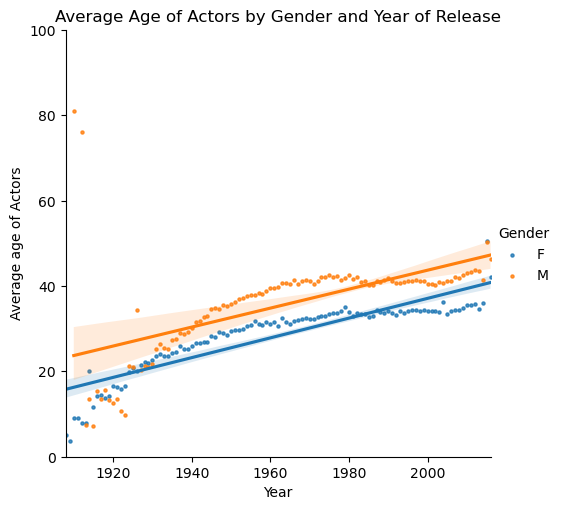

In [30]:
#now to break it down by gender...
#trying to include additional argument : scatter_kws={"s": char_a_filt['size']} , but get errors each time

sns.lmplot(x='Release Date', y='mean',data = char_a_filt, hue = 'Gender', scatter_kws={"s":5})
plt.xlabel("Year")
plt.ylabel("Average age of Actors")
plt.title("Average Age of Actors by Gender and Year of Release")
plt.ylim([0,100])
plt.xlim([char_a_filt['Release Date'].min(),char_a_filt['Release Date'].max()]);

The two lines below run over the dataset before we grouped (get the actual average)

In [31]:
char_a_dropped.loc[char_a_dropped['Gender'] == 'M']['Actor age at Release'].mean()

40.44337002151166

In [32]:
char_a_dropped.loc[char_a_dropped['Gender'] == 'F']['Actor age at Release'].mean()

33.02033331318139

It is interesting to note that males tend to be older than women in cinema over the last hundred years. this difference is manifest in the average male age of 40 relative to a womens of 33. 
Another thing we see here is there the age seems to be rising. I propose that this is not as strongly the case as one would initially believe. My hypothesis is as follows: the age at release data is lacking for older actors at the beginning of the 20th century. simply put, record keeping was not as good as it is now. This is manifest in the fact that the data we do have on actors with roles in the early 20th century are all quite young - ie they lived long enough to enter modern database management 


In [33]:
# This doesnt currenlty work but the idea is show how many entries are missing actor ages and break it down by decade
# in such a manner we can show that in earlier years there is a much larger proportion of missing data?

# characters.loc[characters['Actor age at Release'].isnull() and characters['Release Date'] < 1930]

## Gendered

In [72]:
char_gen = pd.DataFrame(characters.groupby(['Release Date','Gender'])['Gender'].agg('size'))
char_gen.set_axis(['Count'],axis = 'columns', inplace = True)

Count
Release Date Gender       
1888.0       F           2
             M           2
1891.0       M           1
1893.0       M           2
1894.0       F           1
...                    ...
2014.0       M          21
2015.0       F           2
             M          12
2016.0       F           2
             M           4

[247 rows x 1 columns]

how to make use of this... just a % of m/f each year? 

In [74]:
for i in set(char_gen.index):
    print (char_gen.loc[i])

Count    147
Name: (1912.0, F), dtype: int64
Count    295
Name: (1923.0, F), dtype: int64
Count    833
Name: (1967.0, F), dtype: int64
Count    1097
Name: (1978.0, F), dtype: int64
Count    1571
Name: (1989.0, F), dtype: int64
Count    1831
Name: (1993.0, F), dtype: int64
Count    1483
Name: (1935.0, M), dtype: int64
Count    5
Name: (1900.0, M), dtype: int64
Count    147
Name: (1911.0, M), dtype: int64
Count    1726
Name: (1955.0, M), dtype: int64
Count    315
Name: (1925.0, F), dtype: int64
Count    2480
Name: (1979.0, M), dtype: int64
Count    1116
Name: (1980.0, F), dtype: int64
Count    3319
Name: (1990.0, M), dtype: int64
Count    1601
Name: (1991.0, F), dtype: int64
Count    6221
Name: (2001.0, M), dtype: int64
Count    426
Name: (1929.0, F), dtype: int64
Count    575
Name: (1940.0, F), dtype: int64
Count    733
Name: (1951.0, F), dtype: int64
Count    1912
Name: (1995.0, F), dtype: int64
Count    5236
Name: (2006.0, F), dtype: int64
Count    398
Name: (1913.0, M), dtype: int64


## TODO

-scale each datapoint in the m/f age graph with the amount of entities that were averaged to form it. issues: lmplot does not support this. lineplot is ugly with the outlier, I could potentially make a scatterplot and fit it myself ?

-somehow groupby decade and describe the amount of rows we had to drop because there was no age data. we should see that in the earlier years we had to drop alot (little data on old ppl long ago, relative to the ones who were young and had better records in the 1900's)

### Ethnicity analysis

In [34]:
characters.sample(3)

,W_ID,F_ID,Release Date,Char_Name,Actor DOB,Gender,Height (m),Ethnicity,Actor,Actor age at Release,FB_Charactor/actor map id,FB_char_ID,FB_Actor_ID
273746,13201636,/m/03bypg3,1981.0,NaN,11/22/1924,F,1.715,NaN,Geraldine Page,56.0,/m/040k9ht,NaN,/m/01dbhb
182104,12579118,/m/02wwl8v,2005.0,Gunner,6/22/1974,M,1.830,/m/0x67,Donald Faison,30.0,/m/0h30jm4,/m/0h30jm7,/m/03574m
171313,31710898,/m/0gmg9bg,1921.0,NaN,1880-08-08,M,NaN,NaN,Fred Groves,NaN,/m/0h5lrcj,NaN,/m/0g9g1n2


In [35]:
char_E_dropped = characters[characters['Ethnicity'].notnull()]  #dropping null ethnicities

In [36]:
char_E_dropped.sample(3)

,W_ID,F_ID,Release Date,Char_Name,Actor DOB,Gender,Height (m),Ethnicity,Actor,Actor age at Release,FB_Charactor/actor map id,FB_char_ID,FB_Actor_ID
296199,2157292,/m/06r1z1,2004.0,Sackville,9/11/1971,M,1.702,/m/02w7gg,Johnny Vegas,33.0,/m/03jq9v5,/m/0h345wc,/m/02ms5g
184220,5541237,/m/0drnk0,2003.0,Shark,3/5/1966,M,1.780,/m/04gfy7,Aasif Mandvi,36.0,/m/0cg57y5,/m/0h5kkmf,/m/0g2mbn
247319,1820344,/m/05zj2r,1993.0,NaN,4/29/1958,M,NaN,/m/0xnvg,Marc Coppola,34.0,/m/0gbwqqs,NaN,/m/03c6t_n


In [37]:
print('Only {:.4} % of charactors have an associated ethnicity'.format(100 * len(char_E_dropped)/len(characters)))

Only 23.53 % of charactors have an associated ethnicity


In [38]:
char_E_filt = pd.DataFrame(char_E_dropped.groupby(["Release Date","Ethnicity"]).size()).reset_index()

In [39]:
char_E_filt.set_axis(['Release Date', 'Ethnicity', 'Count'], axis='columns', inplace=True)
char_E_filt

,Release Date,Ethnicity,Count
0,1891.0,/m/03lmx1,1
1,1894.0,/m/03lmx1,1
2,1896.0,/m/063k3h,1
3,1900.0,/m/041rx,1
4,1901.0,/m/063k3h,1
...,...,...,...
10460,2015.0,/m/02w7gg,1
10461,2015.0,/m/03cbkrf,1
10462,2015.0,/m/0912ll,1
10463,2015.0,/m/0dryh9k,5


(1891.0, 2015.0)

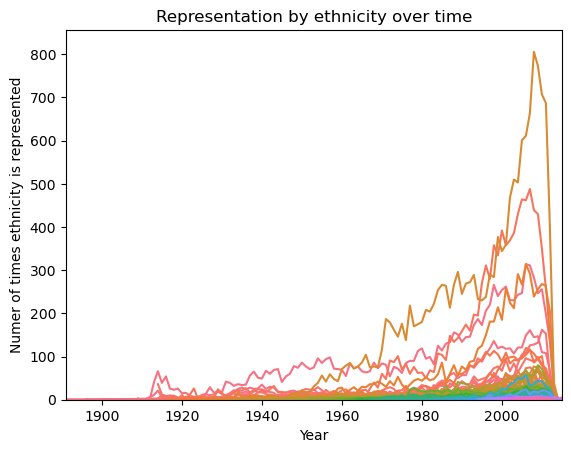

In [40]:
sns.lineplot(x='Release Date', y='Count',data = char_E_filt, hue = 'Ethnicity', legend=False)
plt.xlabel("Year")
plt.ylabel("Numer of times ethnicity is represented")
plt.title("Representation by ethnicity over time")
plt.ylim([0,char_E_filt['Count'].max()+50])
plt.xlim([char_E_filt['Release Date'].min(),char_E_filt['Release Date'].max()])
#plt.yscale('log')

ideas - groups of ethnicities, top 10, or group by continents